In [1]:
from keras.datasets import mnist

(X_train, _), (X_test, _) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [2]:
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

In [3]:
X_train = X_train/255.
X_test = X_test/255.

X_train = X_train.reshape(60000, 28*28)
X_test = X_test.reshape(10000, 28*28)

In [4]:
X_train.shape, X_test.shape

((60000, 784), (10000, 784))

In [5]:
encoding_dim = 32

In [6]:
from keras import layers

input_img = layers.Input(shape=(784,))

In [7]:
encoded = layers.Dense(256, activation='elu')(input_img)
encoded = layers.Dense(128, activation='elu')(encoded)
encoded = layers.Dense(encoding_dim, activation='elu')(encoded)

In [8]:
encoded # shape=(None, 32) => 32개 노드..?

<KerasTensor: shape=(None, 32) dtype=float32 (created by layer 'dense_2')>

In [9]:
decoded = layers.Dense(128, activation='elu')(encoded)
decoded = layers.Dense(256, activation='elu')(decoded)
decoded = layers.Dense(784, activation='sigmoid')(decoded)

In [25]:
from keras import models

autoencoder = models.Model(input_img, decoded)
autoencoder.summary()

Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_2 (Dense)              (None, 32)                4128      
_________________________________________________________________
dense_3 (Dense)              (None, 128)               4224      
_________________________________________________________________
dense_4 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_5 (Dense)              (None, 784)               2014

In [11]:
encoder = models.Model(input_img, encoded)
encoder.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_2 (Dense)              (None, 32)                4128      
Total params: 237,984
Trainable params: 237,984
Non-trainable params: 0
_________________________________________________________________


In [29]:
encoded_input = layers.Input(shape = (encoding_dim,))

decoder_layer = autoencoder.layers[-3](encoded_input)
decoder_layer = autoencoder.layers[-2](decoder_layer)
decoder_layer = autoencoder.layers[-1](decoder_layer)

decoder = models.Model(encoded_input, decoder_layer)




decoder.summary()

Model: "model_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         [(None, 32)]              0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               4224      
_________________________________________________________________
dense_4 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_5 (Dense)              (None, 784)               201488    
Total params: 238,736
Trainable params: 238,736
Non-trainable params: 0
_________________________________________________________________


In [30]:
autoencoder.compile(loss='binary_crossentropy', # x_hat(결과값)이 x와 같으냐 or 다르냐.. 2진분류
                    optimizer='adam')

In [31]:
autoencoder.fit(X_train, X_train, # y값이 x값. 자기 자신을 그대로 복원하는 게 목적이니까
                epochs=50, batch_size=256, validation_data=(X_test, X_test))

Epoch 1/50
235/235 [==============================] - 1s 4ms/step - loss: 0.0817 - val_loss: 0.0772
Epoch 2/50
235/235 [==============================] - 1s 4ms/step - loss: 0.0770 - val_loss: 0.0769
Epoch 3/50
235/235 [==============================] - 1s 4ms/step - loss: 0.0768 - val_loss: 0.0770
Epoch 4/50
235/235 [==============================] - 1s 4ms/step - loss: 0.0770 - val_loss: 0.0773
Epoch 5/50
235/235 [==============================] - 1s 4ms/step - loss: 0.0767 - val_loss: 0.0768
Epoch 6/50
235/235 [==============================] - 1s 4ms/step - loss: 0.0766 - val_loss: 0.0769
Epoch 7/50
235/235 [==============================] - 1s 4ms/step - loss: 0.0766 - val_loss: 0.0768
Epoch 8/50
235/235 [==============================] - 1s 4ms/step - loss: 0.0763 - val_loss: 0.0768
Epoch 9/50
235/235 [==============================] - 1s 4ms/step - loss: 0.0765 - val_loss: 0.0767
Epoch 10/50
235/235 [==============================] - 1s 4ms/step - loss: 0.0763 - val_loss: 0.0766

In [16]:
encoded_imgs = encoder.predict(X_test)
encoded_imgs.shape

(10000, 32)

In [32]:
decoded_imgs = decoder.predict(encoded_imgs)
decoded_imgs.shape

(10000, 784)

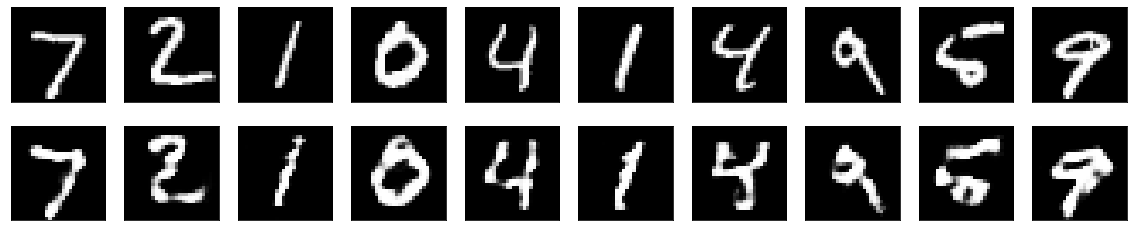

In [34]:
import matplotlib.pyplot as plt

n = 10

plt.figure(figsize=(20,4))
for i in range(n):
  ax = plt.subplot(2, n, i+1)
  plt.imshow(X_test[i].reshape(28,28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  ax = plt.subplot(2, n ,i+1+n)
  plt.imshow(decoded_imgs[i].reshape(28,28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

plt.show()